In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  5 04:57:13 2018

@author: Marnissi Oussama
"""

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('lab2_data.csv', sep='\t')

# Data Preprocessing
trueValues = np.array(dataset.loc[:, 'churn'])
predictedValues = dataset.loc[:, 'churn_pred_prob'].replace(r',', '.', regex=True)#convert str to float 
predictedValues = np.array(predictedValues.astype('float64'))

AUC:  78.7281%


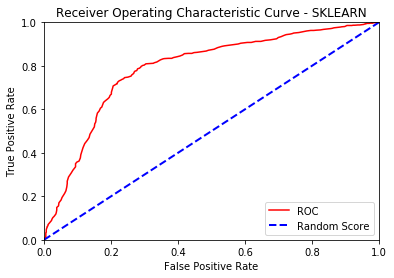

AUC:  78.6244%


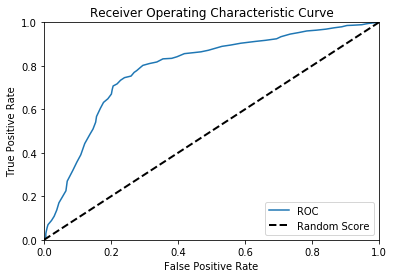

ACCURACY:  61.34%
PRECISION:  62.47%
RECALL:  64.68%
F1 SCORE:  63.56%
AUC:  78.6244%
AUC:  78.7281%


In [5]:




# =============================================================================
# Method with Sklearn 
# =============================================================================


# FPR, TPR, TRESHOLD for roc curve 
from sklearn import metrics
fpr_sk, tpr_sk, tresholds_sk = metrics.roc_curve(trueValues, predictedValues)

# Calculate the AUC
print('AUC: ', '{0:.4f}%'.format(metrics.auc(fpr_sk, tpr_sk) * 100))

# Plot ROC Curve
plt.plot(fpr_sk,tpr_sk, label='ROC', c='r')
plt.plot([0, 1], [0, 1], lw=2, ls='--', c='blue', label='Random Score')
plt.title('Receiver Operating Characteristic Curve - SKLEARN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc=4)
plt.show()

# =============================================================================
# Manual Model
# =============================================================================



# FPR, TPR, TRESHOLD for roc curve 
FPR = []
TPR = []
minPrediction = min(predictedValues)
maxPrediction = max(predictedValues)
threshold = np.linspace(minPrediction, maxPrediction, 80)

# Initialisation of Positif, Negatif, TruePositif, FalsePositif, TrueNegatif, FalseNegatif

P = sum(trueValues)
N = len(trueValues) - P
tp_Global = 0
fp_Global = 0
fn_Global = 0
tn_Global = 0

# Calculating FP and TP of every data and add it to FPR and TPR // by N or P
# Calculating TP, FP, FN and TN in the same time for the quality mesurment
for (i, T) in enumerate(threshold):
    FP = 0
    TP = 0
    for i in range(0, len(predictedValues)):
        if predictedValues[i] > T:
            if trueValues[i] == 1:
                TP += 1
                tp_Global += 1
            if trueValues[i] == 0:
                FP += 1
                fp_Global += 1
        elif predictedValues[i] < T:
            if trueValues[i] == 1:
                fn_Global += 1
            if trueValues[i] == 0:
                tn_Global += 1
    FPR.append(FP/float(N))
    TPR.append(TP/float(P))
    
# Calculate the AUC
auc = np.trapz(TPR, FPR)
print('AUC: ', '{0:.4f}%'.format(-auc * 100))    

# Plot ROC Curve
plt.plot(FPR, TPR, label='ROC')
plt.plot([0, 1], [0, 1], lw=2, ls='--', c='black', label='Random Score')
plt.title('Receiver Operating Characteristic Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Model quality mesures:

# Accuracy:
accuracy = (tp_Global + tn_Global) / (tp_Global + fp_Global + fn_Global + tn_Global)
print('ACCURACY: ', '{0:.2f}%'.format(accuracy * 100))

# Presision:
precision = tp_Global / (tp_Global + fp_Global)
print('PRECISION: ', '{0:.2f}%'.format(precision * 100))

# Recall:
recall = tp_Global / (tp_Global + fn_Global)
print('RECALL: ', '{0:.2f}%'.format(recall * 100))

# F1 Score:
fscore = 2 * (recall * precision) / (recall + precision)
print('F1 SCORE: ', '{0:.2f}%'.format(fscore * 100))

# =============================================================================
# Comparing The Two Method
# =============================================================================

# Calculate the AUC of the manual Method
auc = np.trapz(TPR, FPR)
print('AUC: ', '{0:.4f}%'.format(-auc * 100))   

# Calculate the AUC of the Sklearn Method
print('AUC: ', '{0:.4f}%'.format(metrics.auc(fpr_sk, tpr_sk) * 100))


